Ejercicio 1:

Resolver oscilador amortiguado: $$m \ddot x=-k x -b \dot x,$$ usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$. Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos. Nota: El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de Euler que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

Utilizaré los códigos de los métodos usados en las tareas pasadas de Euler y Runge Kutta

In [19]:
function MetodoEuler(f,list1,x0)
     x = x0
     h = list1[2]-list1[1]
     list2=[]
     push!(list2,x)
     for i in 2:length(list1)
         t = i*h
        x = x + f(x,t)*h
      
        push!(list2,x) 
     end
     return list2
end

MetodoEuler (generic function with 1 method)

In [20]:
function RK4(f,list1,x0)
     x = x0
     h = list1[2]-list1[1]
     list2=[]
     push!(list2,x)
     for i in 2:length(list1)
        t = i*h
        k1 = f(x,t);
        k2 = f(x+(h/2)*k1,t+(h/2));
        k3 = f(x+(h/2)*k2, t+(h/2));
        k4 = f(x+h*k3, t+h);
        x = x+(h/6)*(k1+2*k2+2*k3+k4);
        push!(list2,x) 
     end
     return list2
end

RK4 (generic function with 1 method)

In [21]:
f(x,t)=[x[2], -1.0*x[1]-x[2]] #Función con la que se trabajará

f (generic function with 1 method)

In [22]:
list1=0:0.001:10; #Intervalo de graficación

sols=MetodoEuler(f,list1,[1,0]) #Donde se guardaran las soluciones segun sea el método a utilizar

listx1=map(x->x[1],sols) #listas de soluciones
listx2=map(x->x[2],sols)

10001-element Array{Any,1}:
  0         
 -0.001     
 -0.001999  
 -0.002997  
 -0.003994  
 -0.00499   
 -0.005985  
 -0.006979  
 -0.007972  
 -0.008964  
 -0.009955  
 -0.010945  
 -0.011934  
  ⋮         
 -0.00545811
 -0.0054505 
 -0.00544289
 -0.00543529
 -0.00542769
 -0.00542009
 -0.0054125 
 -0.00540491
 -0.00539731
 -0.00538973
 -0.00538214
 -0.00537455

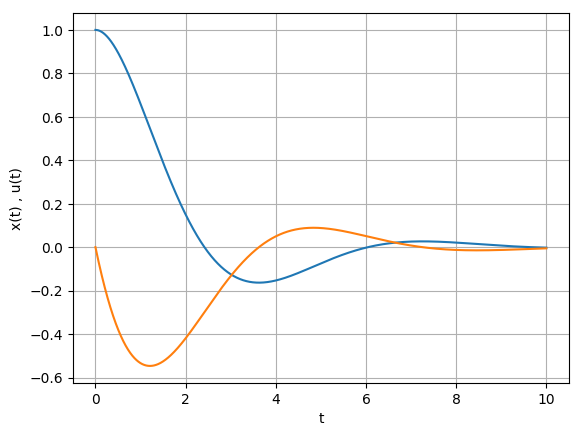

In [25]:
using PyPlot #Gráfica con las dos aproximaciones de Euler
xlabel("t")
ylabel("x(t) , u(t)")
plot(list1,listx1)
plot(list1,listx2)
grid()

Ahora con Runge Kutta. Se hace el mismo procedimiento pero utlizando el método de RK

In [26]:
solsRK4=RK4(f,list1,[1,0]);

listx1RK=map(x->x[1],sols)
listx2Rk=map(x->x[2],sols)

10001-element Array{Any,1}:
  0         
 -0.001     
 -0.001999  
 -0.002997  
 -0.003994  
 -0.00499   
 -0.005985  
 -0.006979  
 -0.007972  
 -0.008964  
 -0.009955  
 -0.010945  
 -0.011934  
  ⋮         
 -0.00545811
 -0.0054505 
 -0.00544289
 -0.00543529
 -0.00542769
 -0.00542009
 -0.0054125 
 -0.00540491
 -0.00539731
 -0.00538973
 -0.00538214
 -0.00537455

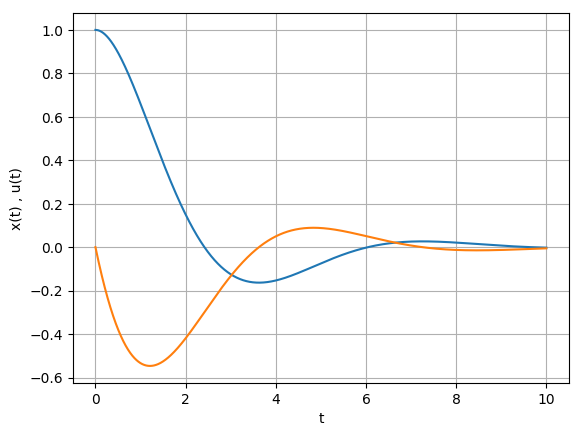

In [28]:
xlabel("t")
ylabel("x(t) , u(t)")
plot(list1,listx1RK)
plot(list1,listx2Rk)
grid()

Ahora la parte de espacio fase. Mismo procedimeinto pero con ambos métodos en las listas

In [35]:
list3=0:0.01:100;

sols=MetodoEuler(f,list3,[1,0]);
solsRK4=RK4(f,list3,[1,0]);

listE1=map(x->x[1],sols);
listE2=map(x->x[2],sols);
list1rk4=map(x->x[1],solsRK4);
list2rk4=map(x->x[2],solsRK4);

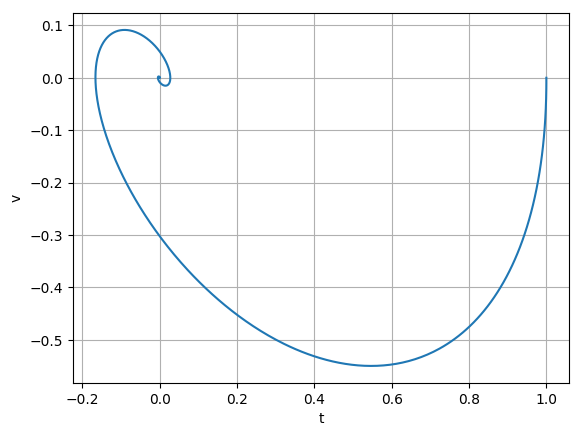

In [36]:
xlabel("t")
ylabel("v")
plot(listE1,listE2)
grid()

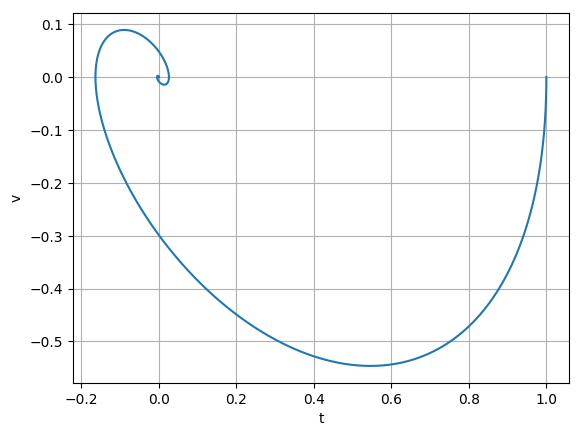

In [37]:
xlabel("t")
ylabel("v")
plot(list1rk4,list2rk4);
grid()

Comparación de los métodos

Ejercicio 2: 

Resolver el péndulo simple: $$l \ddot\theta=-g \sin(\theta),$$ usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.


Procedimiento similar que el ejercicio 1

In [44]:
g(x,t)=[x[2],-sin.(x[1])] #Función con la que se trabajará

list4=0:0.01:50;

sols=RK4(g,list4,[1,0]);

glistrk1=map(x->x[1],sols)
glistrk2=map(x->x[2],sols)

5001-element Array{Any,1}:
  0         
 -0.00841463
 -0.0168288 
 -0.0252421 
 -0.033654  
 -0.0420641 
 -0.0504719 
 -0.058877  
 -0.0672788 
 -0.0756771 
 -0.0840712 
 -0.0924607 
 -0.100845  
  ⋮         
 -0.29917   
 -0.291052  
 -0.282916  
 -0.274764  
 -0.266596  
 -0.258413  
 -0.250215  
 -0.242003  
 -0.233776  
 -0.225537  
 -0.217285  
 -0.20902   

In [47]:
xlabel("t")
ylabel("x(t) , u(t)")
plot(list4,glistrk1)
plot(list4,glistrk2)
grid()

Aproximaciones a la solución por metodo de Runge Kutta

Ahora el espacio fase con valores aleatorios (rand)

In [117]:
rand1=linspace(-2,2,100)
list5=1:0.01:50;

for i in 1:length(rand1)
    solsrk4=RK4(g,list5,[rand1[i],rand1[i]]);
    glistrk1=map(x->x[1],solsrk4)
    glistrk2=map(x->x[2],solsrk4)
    
    xlabel("t")
    ylabel(L"\vec{v}")   
    plot(glistrk1,glistrk2)
    xlim(-20,20)
    grid()
end

Espacio fase del péndulo simple por Runge

El sistema vuelve al mismo estado después de realizar un ciclo completo.

El movimiento del péndulo es el mismo en el sentido a las manecillas del reloj.

El movimiento varía después del rango -2.5 y 2.5. Como en forma de onda.

Ejercicio 3:

Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema: $$\frac{dx}{dt}=x^2-1,$$ hay dos puntos fijos, ubicados en $1$ y $-1$, compruebe además que el $1$ es un repulsor y el $-1$ un atractor. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [104]:
#Se trabajará con rK de 4to orden
function RK(f,x0,t0,tf,h)
    list1=t0:h:tf
    list2=[x0]
    x=x0
    for i in 1:length(list1)-1
        
    k1=f(x,list1[i])#Se agregan las dos operaciones para cuarto orden
    k2=f(x+(h/2)*k1,list1[i]+h/2)  
    k3=f(x+(h/2)*k2,list1[i]+h/2) 
    k4=f(x+h*k3,list1[i]+h)
        
    x=x+(h/6)*(k1+2k2+2k3+k4)
        
        push!(list2,x)
    end
    return list1,list2
end


RK (generic function with 1 method)

In [106]:
function z(x,t)  #función con la que se trabajará
    return (x*x)-1
    end

z (generic function with 1 method)

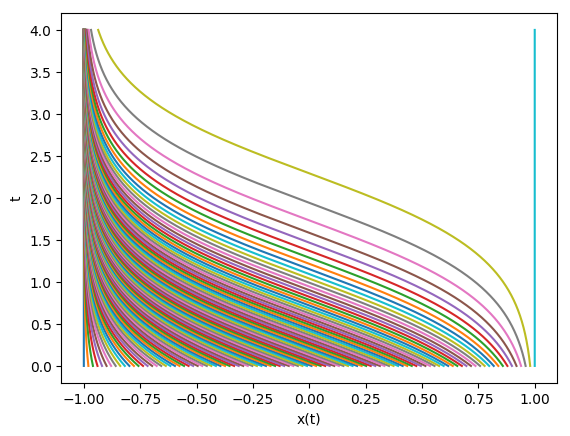

In [162]:
rand2=linspace(-1,1,100)  #Código para espacio fase con Rk de 4to orden

for i in 1:length(rand2)
    K=RK(z,rand2[i],0,4,.0001);
    xlabel("x(t)")
    ylabel("t")
    plot(K[2],K[1])
    grid()
end

Efectivamente -1 es un punto a tractor. Mientras que 1 es un punto repulsor

Ejercicio 4: 

También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema: $$\frac{dx}{dt}=x^2,$$ cual es el punto fijo único?, es un atractor o un repulsor?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [111]:
function z2(x,t) #Función a trabajar
    return x*x
    end

z2 (generic function with 1 method)

In [129]:
rand3=linspace(-3,3,100)  #lo mismo pero con la nueva función

for i in 1:length(rand3)
    K=RK(z2,rand3[i],0,5,.0001);
    xlabel("x(t)")
    ylabel("t")
    xlim(-5,5)
    ylim(0,5)
    plot(K[2],K[1])
    grid()
end

Se puede notar que cero es un punto silla

Ejercicio 5:

Se hará el mismo código sólo variando las condiciones iniciales

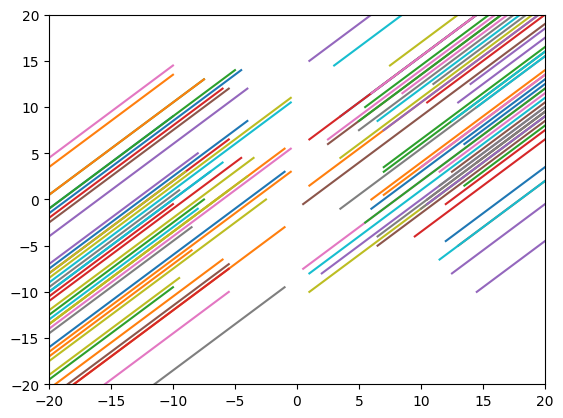

In [141]:
list6= -5:0.01:5;

#La función que queremos resolver.
a(x,t)=[x[1],x[1]]

for i in 1:100
    ω = 0.5*rand(-20:30,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end

In [145]:
list6= -10:0.01:5;

#La función que queremos resolver.
a(x,t)=[-x[1],-x[1]]

for i in 1:200
    ω = 0.5*rand(-30:30,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end

In [148]:
list6= -10:0.01:10;

#La función que queremos resolver.
a(x,t)=[x[1]-2*x[2],0]

for i in 1:200
    ω = 0.5*rand(-30:30,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end

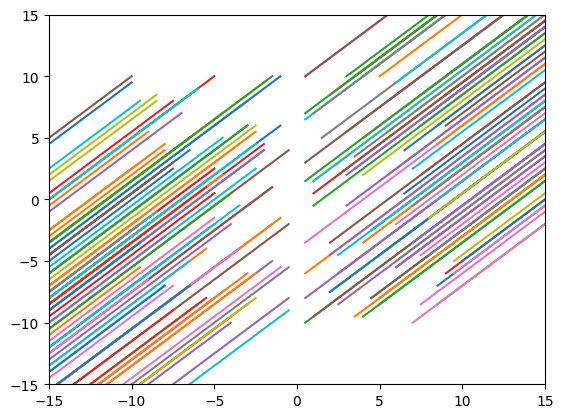

In [150]:
list6= -10:0.01:5;

#La función que queremos resolver.
a(x,t)=[x[1]-.5*x[2],0]

for i in 1:200
    ω = 0.5*rand(-20:20,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-15,15)
    ylim(-15,15)
    grid()
end

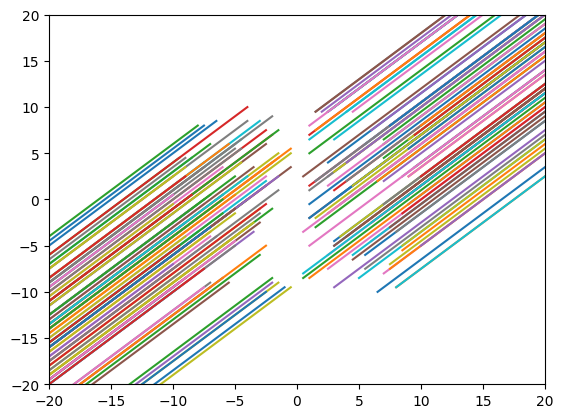

In [151]:
list6= -10:0.01:5;

#La función que queremos resolver.
a(x,t)=[-x[2],x[1]]

for i in 1:200
    ω = 0.5*rand(-20:20,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end

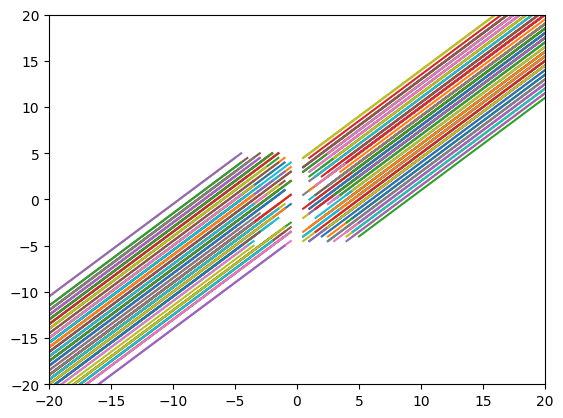

In [152]:
list6= -10:0.01:5

#La función que queremos resolver.
a(x,t)=[x[1]+x[2],-x[1]+x[2]]

for i in 1:300
    ω = 0.5*rand(-10:10,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end

In [153]:
list6= -10:0.01:5

#La función que queremos resolver.
a(x,t)=[-x[1]-x[2],-x[1]-x[2]]

for i in 1:300
    ω = 0.5*rand(-20:20,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end

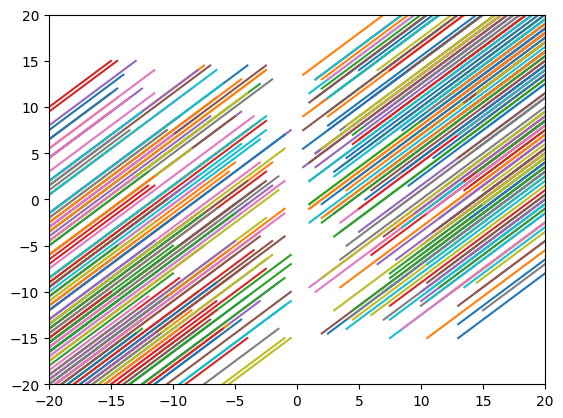

In [154]:
list6= -10:0.01:5

#La función que queremos resolver.
a(x,t)=[-x[1]-x[2],x[1]-x[2]]

for i in 1:400
    ω = 0.5*rand(-30:30,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end

In [158]:
list6= -10:0.01:5

#La función que queremos resolver.
a(x,t)=[x[1]+4*x[2],-2*x[1]+x[2]]

for i in 1:500
    ω = 0.5*rand(-50:50,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end

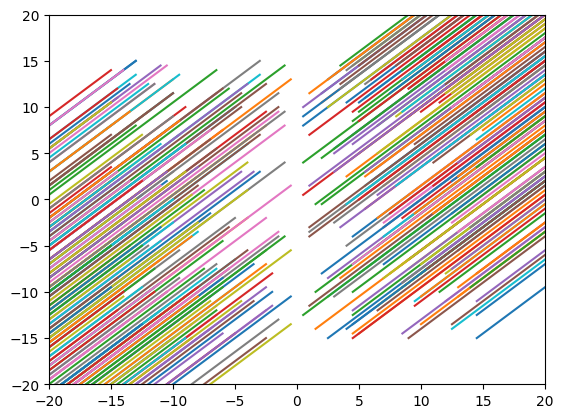

In [159]:
list6= -10:0.01:5

#La función que queremos resolver.
a(x,t)=[-x[1]-x[2],-x[2]]
for i in 1:400
    ω = 0.5*rand(-30:30,2,1)
    solsrk=RK4(a,list6,ω);
    alistrk1=map(x->x[1],solsrk)
    alistrk2=map(x->x[2],solsrk)
    plot(alistrk1,alistrk2);
    xlim(-20,20)
    ylim(-20,20)
    grid()
end